In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [3]:
train_file_list = os.listdir('C:/Users/a1882/Desktop/EEG/eegdata_rnn/train')
saved_path = os.getcwd()
print("Current Working Directory is " + saved_path)
os.chdir(r"C:\Users\a1882\Desktop\EEG\eegdata_rnn\train")
for train_file_name in train_file_list:
    print(train_file_name)
os.chdir(saved_path)

Current Working Directory is C:\Users\a1882\Desktop\EEG
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_0.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_1.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_10.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_11.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_12.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_13.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_14.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_2.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_4.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_5.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_6.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_7.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_9.csv
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv_0.csv
l

In [4]:
train_labels = []
for train_file_name in train_file_list:
    train_labels.append(train_file_name.split('_')[0])

print(train_labels)
print(train_labels[3])

label_map = {'lefthand': 0, 'read': 1, 'rest': 2, 'walkbase': 3, 'walkl': 4 ,'walkfocus': 5}

encode_labels  = [label_map[train_label] for train_label in train_labels]

train_label = torch.tensor(encode_labels, dtype=torch.int64)

['lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'rest', 'rest', 'rest', 'rest', 'rest', 're

In [5]:
valid_file_list = os.listdir('C:/Users/a1882/Desktop/EEG/eegdata_rnn/validation')
saved_path = os.getcwd()
print("Current Working Directory is " + saved_path)
os.chdir(r"C:\Users\a1882\Desktop\EEG\eegdata_rnn\validation")
for valid_file_name in valid_file_list:
    print(valid_file_name)
os.chdir(saved_path)

Current Working Directory is C:\Users\a1882\Desktop\EEG
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_3.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_8.csv
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv_14.csv
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_13.csv
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_2.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_1.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_18.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_20.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_26.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_3.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_30.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_31.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_32.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_36.csv
read_bke_02_epocflex_2023.03.22t15.48.25+

In [6]:
os.chdir(saved_path)
valid_labels = []
for valid_file_name in valid_file_list:
    valid_labels.append(valid_file_name.split('_')[0])

print(valid_labels)
print(valid_labels[3])

label_map = {'lefthand': 0, 'read': 1, 'rest': 2, 'walkbase': 3, 'walkl': 4, 'walkfocus': 5}

encode_labels = [label_map[valid_label] for valid_label in valid_labels]

valid_label = torch.tensor(encode_labels, dtype=torch.int64)

['lefthand', 'lefthand', 'lefthand', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfoc

In [7]:
class EEGDataset(Dataset):
    def __init__(self, filelist, root_dir,data_label,transform=None):
        self.filelist = filelist
        self.root_dir = root_dir
        self.data_label = data_label
        self.transform = transform


    def __len__(self):
        return len(self.filelist)

    def __getitem__(self, index):
        #print('index:', index, 'len(self.filelist):', len(self.filelist), 'len(self.data_label):', len(self.data_label))
        data_label = self.data_label[index]
        file_path = os.path.join(self.root_dir, self.filelist[index])
        eeg_data = np.array(pd.read_csv(file_path)).T
        return eeg_data, data_label

In [8]:
train_unique_objects = set(train_labels)
train_class_number = len(train_unique_objects)
print(train_class_number)

valid_unique_objects = set(valid_labels)
valid_class_number = len(valid_unique_objects)
print(valid_class_number)

6
6


In [9]:
train_dataset = EEGDataset(train_file_list, 'C:/Users/a1882/Desktop/EEG/eegdata_rnn/train', train_label)
valid_dataset = EEGDataset(valid_file_list, 'C:/Users/a1882/Desktop/EEG/eegdata_rnn/validation', valid_label)

In [10]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=True)

In [11]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [17]:
class EEG_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(EEG_LSTM, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Set initial states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

In [21]:
model = EEG_LSTM(input_size=31000, hidden_size=128, num_layers=2,num_classes=train_class_number).to(device)
print(model)

EEG_LSTM(
  (lstm): LSTM(31000, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=6, bias=True)
)


In [22]:
X = torch.rand(1, 1, 31000, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([2])


In [46]:
learning_rate = 0.001
batch_size = 64
num_epochs = 30
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [47]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Compute prediction error
        pred = model(X.float())
        loss = loss_fn(pred, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            global train_loss
            train_loss.append(loss)



def test(dataloader, model,loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X.float())
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error:\n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    global valid_loss
    valid_loss.append(test_loss)

In [48]:
# torch.cuda.empty_cache()
# model = model = EEG_LSTM(input_size=31000, hidden_size=128, num_layers=2,num_classes=train_class_number).to(device)
train_loss = []
valid_loss = []
for t in range(num_epochs):
    print(f"Epoch {t + 1}\n-------------------------------")
    model.train(True)
    train(train_loader, model, loss_fn, optimizer)

    model.train(False)
    test(valid_loader, model, loss_fn)

print("Done!")

Epoch 1
-------------------------------
loss: 1.789520  [    0/  533]
Test Error:
 Accuracy: 43.1%, Avg loss: 1.747267 

Epoch 2
-------------------------------
loss: 1.747425  [    0/  533]
Test Error:
 Accuracy: 56.9%, Avg loss: 1.692254 

Epoch 3
-------------------------------
loss: 1.703850  [    0/  533]
Test Error:
 Accuracy: 59.0%, Avg loss: 1.613645 

Epoch 4
-------------------------------
loss: 1.636771  [    0/  533]
Test Error:
 Accuracy: 59.7%, Avg loss: 1.571231 

Epoch 5
-------------------------------
loss: 1.554408  [    0/  533]
Test Error:
 Accuracy: 59.0%, Avg loss: 1.455033 

Epoch 6
-------------------------------
loss: 1.477709  [    0/  533]
Test Error:
 Accuracy: 59.0%, Avg loss: 1.352236 

Epoch 7
-------------------------------
loss: 1.351439  [    0/  533]
Test Error:
 Accuracy: 63.2%, Avg loss: 1.238451 

Epoch 8
-------------------------------
loss: 1.235233  [    0/  533]
Test Error:
 Accuracy: 63.9%, Avg loss: 1.157202 

Epoch 9
------------------------

In [49]:
print(train_loss)
print(valid_loss)

[1.789520025253296, 1.747424840927124, 1.7038499116897583, 1.636771321296692, 1.554408073425293, 1.4777090549468994, 1.3514389991760254, 1.235233187675476, 0.9730809330940247, 1.1586171388626099, 1.0681157112121582, 0.9408162236213684, 0.9459666013717651, 0.901383638381958, 0.842735767364502, 0.9343347549438477, 0.6993455290794373, 0.813758909702301, 0.6554818153381348, 0.5557736754417419, 0.6625856757164001, 0.6289210319519043, 0.7096031904220581, 0.5649620294570923, 0.5656489133834839, 0.5142256021499634, 0.53238445520401, 0.6422430276870728, 0.5279828906059265, 0.4392758905887604]
[1.74726668993632, 1.6922536691029866, 1.6136445601781209, 1.5712305307388306, 1.4550325473149617, 1.3522358338038127, 1.2384506066640217, 1.1572022835413616, 1.127833326657613, 1.0311105052630107, 0.9959077835083008, 0.9342556397120158, 0.9001588424046835, 0.9275261163711548, 0.8463728030522665, 0.9082927902539571, 0.8344331582387289, 0.8621249198913574, 0.9923783342043558, 0.9199853539466858, 0.880131721

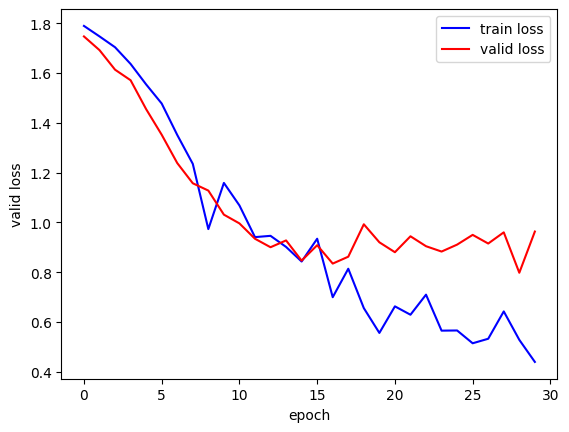

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure()
plt.plot(train_loss,'b',label='train loss')
plt.ylabel('train loss')
plt.xlabel('epoch')
plt.plot(valid_loss,'r',label='valid loss')
plt.ylabel('valid loss')
plt.xlabel('epoch')
plt.legend()

#plt.save(os.path.join('C:/User/a1882/Desktop/EEG','loss.png'))
plt.show()